# TASK - 03

### Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

#### 

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Importing the csv file
data=pd.read_csv('bank.csv')
data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
1,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
2,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
3,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
4,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,32,technician,single,secondary,no,309,yes,yes,cellular,16,apr,346,1,234,3,failure,no
760,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
761,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
762,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
data.shape

(764, 17)

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
1,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
2,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
3,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
4,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [5]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
759,32,technician,single,secondary,no,309,yes,yes,cellular,16,apr,346,1,234,3,failure,no
760,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
761,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
762,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
763,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        764 non-null    int64 
 1   job        764 non-null    object
 2   marital    764 non-null    object
 3   education  764 non-null    object
 4   default    764 non-null    object
 5   balance    764 non-null    int64 
 6   housing    764 non-null    object
 7   loan       764 non-null    object
 8   contact    764 non-null    object
 9   day        764 non-null    int64 
 10  month      764 non-null    object
 11  duration   764 non-null    int64 
 12  campaign   764 non-null    int64 
 13  pdays      764 non-null    int64 
 14  previous   764 non-null    int64 
 15  poutcome   764 non-null    object
 16  y          764 non-null    object
dtypes: int64(7), object(10)
memory usage: 101.6+ KB


In [7]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [10]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,41.277487,1600.434555,14.585079,273.887435,2.037958,224.634817,3.019634
std,11.331024,2980.860786,7.814483,246.587595,1.590395,113.201111,2.939919
min,20.000000,-1400.000000,1.000000,5.000000,1.000000,1.000000,1.000000
25%,33.000000,141.250000,7.750000,119.750000,1.000000,140.000000,1.000000
50%,38.000000,624.500000,14.000000,203.000000,1.000000,190.000000,2.000000
75%,48.000000,1648.750000,19.250000,332.000000,2.000000,329.250000,4.000000
max,86.000000,26306.000000,31.000000,1579.000000,11.000000,871.000000,25.000000


<Axes: xlabel='age'>

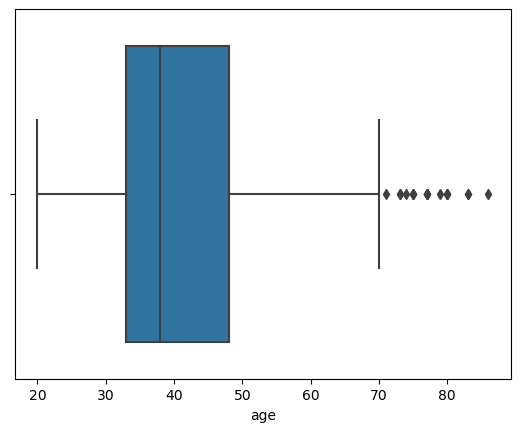

In [50]:
# Boxplot for 'age'
sns.boxplot(x=data["age"])

C:\Users\benec\AppData\Local\Temp\ipykernel_2580\1207828842.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age, bins=100)


<Axes: xlabel='age', ylabel='Density'>

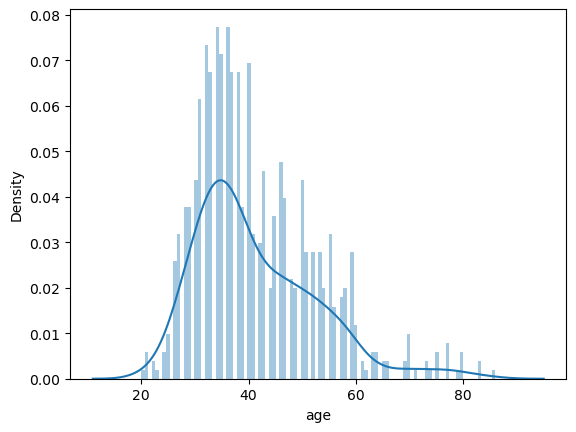

In [51]:
# Distribution of Age
sns.distplot(data.age, bins=100)

C:\Users\benec\AppData\Local\Temp\ipykernel_2580\1713543389.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.duration, bins=100)


<Axes: xlabel='duration', ylabel='Density'>

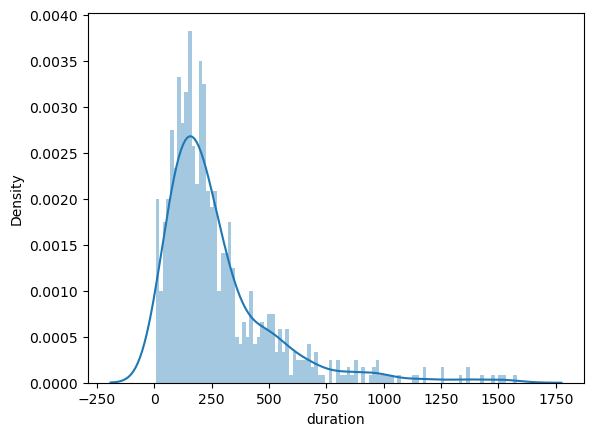

In [53]:
sns.distplot(data.duration, bins=100)
     

<Axes: xlabel='poutcome', ylabel='duration'>

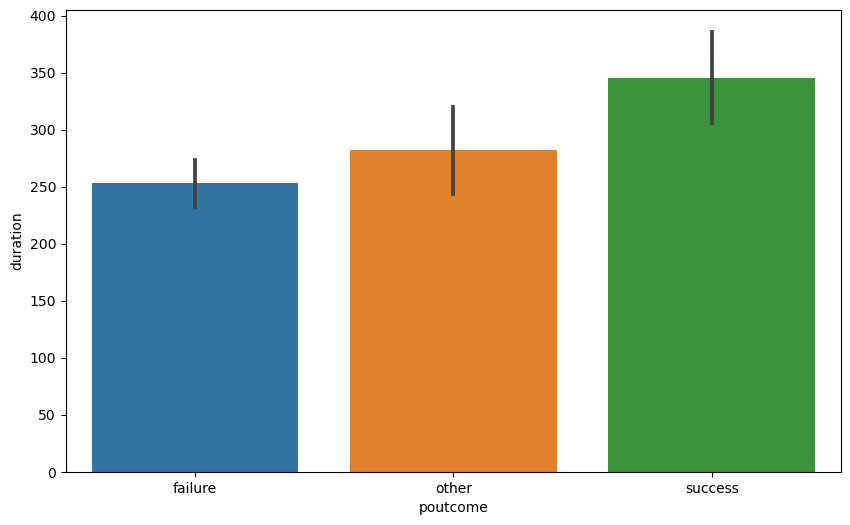

In [56]:
# Bar chart of "previous outcome" Vs "call duration"
plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'duration', data = data)

### One-Hot Encoding

In [33]:
# Drop 'contact', as every participant has been contacted.
data.drop('contact', axis=1, inplace=True)

In [34]:
# values for "default" : yes/no
data["default"]
data['default'] = data['default'].map( {'yes':1, 'no':0} )
#data.drop('default', axis=1,inplace = True)

In [35]:
data

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,33,services,married,secondary,0,4789,yes,yes,11,may,220,1,339,4,failure,no
1,35,management,single,tertiary,0,1350,yes,no,16,apr,185,1,330,1,failure,no
2,35,management,single,tertiary,0,747,no,no,23,feb,141,2,176,3,failure,no
3,36,self-employed,married,tertiary,0,307,yes,no,14,may,341,1,330,2,other,no
4,43,services,married,primary,0,-88,yes,yes,17,apr,313,1,147,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,32,technician,single,secondary,0,309,yes,yes,16,apr,346,1,234,3,failure,no
760,42,blue-collar,single,secondary,0,1080,yes,yes,13,may,951,3,370,4,failure,yes
761,38,blue-collar,married,secondary,0,1205,yes,no,20,apr,45,4,153,1,failure,no
762,28,blue-collar,married,secondary,0,1137,no,no,6,feb,129,4,211,3,other,no


In [36]:
# values for "housing" : yes/no
data["housing"]=data['housing'].map({'yes':1, 'no':0})
#data.drop('housing', axis=1,inplace = True)

In [37]:
# values for "loan" : yes/no
data["loan"] = data['loan'].map({'yes':1, 'no':0})
#data.drop('loan', axis=1, inplace=True)

In [38]:
# values for "y" : yes/no
data["y"] = data['y'].map({'yes':1, 'no':0})
#bank_data.drop('loan', axis=1, inplace=True)

In [39]:
# day  : last contact day of the month
# month: last contact month of year
# Drop 'month' and 'day' as they don't have any intrinsic meaning
data.drop('month', axis=1, inplace=True)
data.drop('day', axis=1, inplace=True)

In [40]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign
#       -1 means client was not previously contacted

print("Customers that have not been contacted before:", len(data[data.pdays==-1]))
print("Maximum values on pdays    :", data['pdays'].max())

Customers that have not been contacted before: 0
Maximum values on pdays    : 871


In [41]:
data

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,33,services,married,secondary,0,4789,1,1,220,1,339,4,failure,0
1,35,management,single,tertiary,0,1350,1,0,185,1,330,1,failure,0
2,35,management,single,tertiary,0,747,0,0,141,2,176,3,failure,0
3,36,self-employed,married,tertiary,0,307,1,0,341,1,330,2,other,0
4,43,services,married,primary,0,-88,1,1,313,1,147,2,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,32,technician,single,secondary,0,309,1,1,346,1,234,3,failure,0
760,42,blue-collar,single,secondary,0,1080,1,1,951,3,370,4,failure,1
761,38,blue-collar,married,secondary,0,1205,1,0,45,4,153,1,failure,0
762,28,blue-collar,married,secondary,0,1137,0,0,129,4,211,3,other,0


In [42]:
# Map padys=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect
data.loc[data['pdays'] == -1, 'pdays'] = 10000
     



In [43]:
# Create a new column: recent_pdays
data['recent_pdays'] = np.where(data['pdays'], 1/data.pdays, 1/data.pdays)

# Drop 'pdays'
data.drop('pdays', axis=1, inplace = True)

In [44]:
data

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,y,recent_pdays
0,33,services,married,secondary,0,4789,1,1,220,1,4,failure,0,0.002950
1,35,management,single,tertiary,0,1350,1,0,185,1,1,failure,0,0.003030
2,35,management,single,tertiary,0,747,0,0,141,2,3,failure,0,0.005682
3,36,self-employed,married,tertiary,0,307,1,0,341,1,2,other,0,0.003030
4,43,services,married,primary,0,-88,1,1,313,1,2,failure,0,0.006803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,32,technician,single,secondary,0,309,1,1,346,1,3,failure,0,0.004274
760,42,blue-collar,single,secondary,0,1080,1,1,951,3,4,failure,1,0.002703
761,38,blue-collar,married,secondary,0,1205,1,0,45,4,1,failure,0,0.006536
762,28,blue-collar,married,secondary,0,1137,0,0,129,4,3,other,0,0.004739


In [45]:
# Convert categorical variables to dummies
df = pd.get_dummies(data=data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
df.head()

,age,default,balance,housing,loan,duration,campaign,previous,y,recent_pdays,...,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success
0,33,0,4789,1,1,220,1,4,0,0.002950,...,0,0,1,0,0,1,0,1,0,0
1,35,0,1350,1,0,185,1,1,0,0.003030,...,0,0,0,1,0,0,1,1,0,0
2,35,0,747,0,0,141,2,3,0,0.005682,...,0,0,0,1,0,0,1,1,0,0
3,36,0,307,1,0,341,1,2,0,0.003030,...,0,0,1,0,0,0,1,0,1,0
4,43,0,-88,1,1,313,1,2,0,0.006803,...,0,0,1,0,1,0,0,1,0,0


In [46]:
df.shape

(764, 30)

In [47]:
df.describe()

,age,default,balance,housing,loan,duration,campaign,previous,y,recent_pdays,...,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,...,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,41.277487,0.006545,1600.434555,0.640052,0.120419,273.887435,2.037958,3.019634,0.223822,0.013425,...,0.026178,0.104712,0.596859,0.298429,0.126963,0.532723,0.340314,0.609948,0.239529,0.150524
std,11.331024,0.080686,2980.860786,0.480299,0.325664,246.587595,1.590395,2.939919,0.417077,0.068763,...,0.159769,0.306383,0.490850,0.457869,0.333150,0.499255,0.474125,0.488081,0.427076,0.357818
min,20.000000,0.000000,-1400.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.001148,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,141.250000,0.000000,0.000000,119.750000,1.000000,1.000000,0.000000,0.003037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,624.500000,1.000000,0.000000,203.000000,1.000000,2.000000,0.000000,0.005263,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,48.000000,0.000000,1648.750000,1.000000,0.000000,332.000000,2.000000,4.000000,0.000000,0.007143,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,86.000000,1.000000,26306.000000,1.000000,1.000000,1579.000000,11.000000,25.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


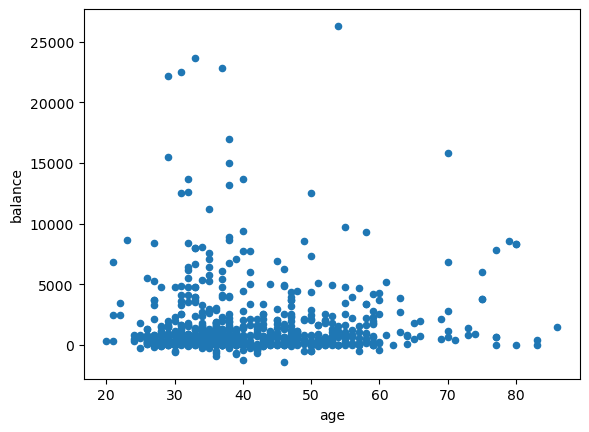

In [48]:
# Scatterplot showing age and balance
df.plot(kind='scatter', x='age', y='balance');

# Across all ages, majority of people have savings of less than 10000.

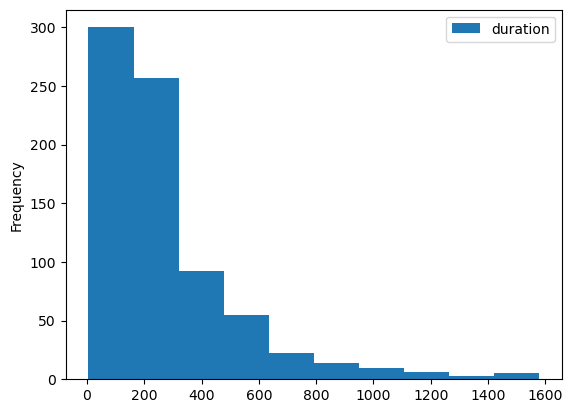

In [49]:
df.plot(kind='hist', x='poutcome_success', y='duration');

In [54]:
df.corr()

,age,default,balance,housing,loan,duration,campaign,previous,y,recent_pdays,...,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success
age,1.000000,0.019514,0.028072,-0.207995,-0.033219,0.088018,-0.047858,-0.028334,0.070593,-0.021741,...,0.018425,0.144138,0.298436,-0.416383,0.271184,-0.061148,-0.126162,0.002297,-0.084440,0.097651
default,0.019514,1.000000,-0.044102,0.060866,0.019847,0.020655,0.028702,-0.000542,-0.004639,-0.011999,...,-0.013307,0.078276,-0.032573,-0.017460,-0.030952,0.010944,0.010224,-0.068216,0.106585,-0.034166
balance,0.028072,-0.044102,1.000000,-0.067996,-0.084386,-0.012971,0.035704,0.003539,0.012924,-0.021232,...,-0.042008,-0.015226,-0.036841,0.049683,-0.023370,-0.093489,0.114865,0.006267,-0.042176,0.041792
housing,-0.207995,0.060866,-0.067996,1.000000,0.118272,-0.011431,0.035068,-0.011696,-0.245012,-0.109974,...,-0.064919,0.007088,0.011875,-0.017473,-0.008888,0.106573,-0.105977,0.177426,0.043898,-0.294413
loan,-0.033219,0.019847,-0.084386,0.118272,1.000000,-0.018877,0.031651,0.012585,-0.082902,0.049657,...,-0.035476,-0.060863,0.074520,-0.039162,-0.044462,0.104707,-0.079015,0.081505,-0.000345,-0.110764
duration,0.088018,0.020655,-0.012971,-0.011431,-0.018877,1.000000,-0.117495,0.033505,0.351698,-0.035946,...,-0.003318,0.025119,-0.033066,0.018639,-0.029787,0.040719,-0.021946,-0.106267,0.019397,0.121802
campaign,-0.047858,0.028702,0.035704,0.035068,0.031651,-0.117495,1.000000,0.082531,-0.052342,-0.008501,...,-0.045179,-0.059272,0.041454,-0.004778,-0.056106,0.033922,0.003704,-0.045061,0.115879,-0.076843
previous,-0.028334,-0.000542,0.003539,-0.011696,0.012585,0.033505,0.082531,1.000000,0.029546,0.017512,...,0.001695,-0.031386,-0.012672,0.034587,0.022876,-0.039281,0.025289,-0.082340,0.079757,0.017121
y,0.070593,-0.004639,0.012924,-0.245012,-0.082902,0.351698,-0.052342,0.029546,1.000000,0.040446,...,0.010298,0.031736,-0.038814,0.020374,-0.063298,-0.032072,0.078249,-0.278782,-0.043849,0.432609
recent_pdays,-0.021741,-0.011999,-0.021232,-0.109974,0.049657,-0.035946,-0.008501,0.017512,0.040446,1.000000,...,0.040311,-0.040995,0.041860,-0.017444,-0.036448,-0.061683,0.090563,-0.142581,0.097982,0.077540


<Axes: >

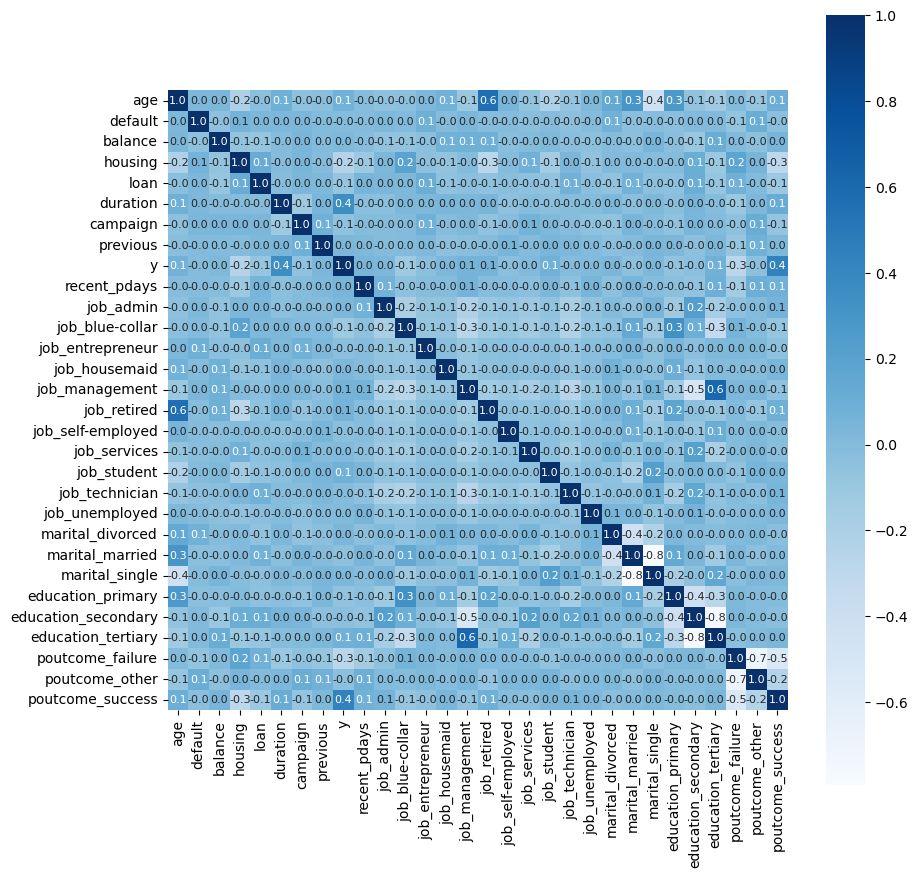

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap="Blues")

### Decision Tree Classifier

In [87]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap 

In [67]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'previous', 'y', 'recent_pdays', 'job_admin', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'poutcome_failure', 'poutcome_other',
       'poutcome_success'],
      dtype='object')

In [68]:
#X is the feature columns, y is the target column

features = ['age', 'balance', 'housing', 'loan','poutcome_failure','poutcome_other','poutcome_success']

X = df[features]
y = df['y']

print(X)
print(y)

     age  balance  housing  loan  poutcome_failure  poutcome_other  \
0     33     4789        1     1                 1               0   
1     35     1350        1     0                 1               0   
2     35      747        0     0                 1               0   
3     36      307        1     0                 0               1   
4     43      -88        1     1                 1               0   
..   ...      ...      ...   ...               ...             ...   
759   32      309        1     1                 1               0   
760   42     1080        1     1                 1               0   
761   38     1205        1     0                 1               0   
762   28     1137        0     0                 0               1   
763   44     1136        1     1                 0               1   

     poutcome_success  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
..             

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
dt_classifier = DecisionTreeClassifier(max_depth=3)

In [71]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [72]:
y_pred = dt_classifier.predict(X_test)

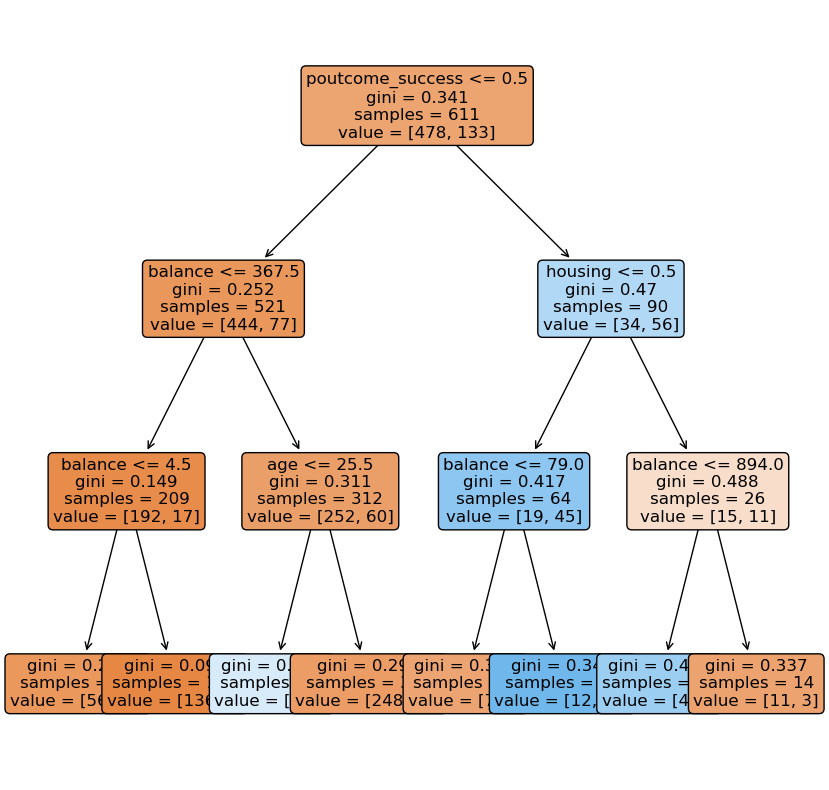

In [74]:
plt.figure(figsize=(10, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns.tolist(), rounded=True, fontsize=12)
plt.show()

In [86]:
#Creating the Confusion matrix  
cm= confusion_matrix(y_test, y_pred) 
cm
#This indicates the 5+26= 31 incorrect predictions and 110+12=122 correct predictions.

array([[110,   5],
       [ 26,  12]], dtype=int64)

In [79]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Accuracy

0.7973856209150327

In [80]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.81      0.96      0.88       115
           1       0.71      0.32      0.44        38

    accuracy                           0.80       153
   macro avg       0.76      0.64      0.66       153
weighted avg       0.78      0.80      0.77       153

